In [1]:
import os, cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from sklearn.utils import shuffle

import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### Preparing Data

In [2]:
# Flower Image Source: https://github.com/JerryKurata/GettingStartedWithTensorFlow-TransferLearning.git
!git clone https://github.com/JerryKurata/GettingStartedWithTensorFlow-TransferLearning.git

Cloning into 'GettingStartedWithTensorFlow-TransferLearning'...
remote: Enumerating objects: 3708, done.
remote: Total 3708 (delta 0), reused 0 (delta 0), pack-reused 3708
Receiving objects: 100% (3708/3708), 218.60 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (3700/3700), done.


In [0]:
# Contents inside train data folder
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos"

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [0]:
# Count of images in different categories

!echo "Daisy Image count: "
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/daisy" | wc -l

!echo "Dandelion Image count: "
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/dandelion" | wc -l

!echo "Roses Image count: "
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/roses" | wc -l

!echo "Sunflower Image count: "
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/sunflowers" | wc -l

!echo "Tulips Image count: "
!ls "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/tulips" | wc -l

Daisy Image count: 
633
Dandelion Image count: 
898
Roses Image count: 
641
Sunflower Image count: 
699
Tulips Image count: 
799


In [0]:
# Reading Images & Preprocessing them
'''
    1. Read image by OpenCV
    2. Resize each image into same shape
    3. Normalise all images i.e divide each pixel by 255
'''
# At the end, we'll have 5 different arrays each with flower images of the same category.



data_path = "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/"
categories = ["daisy",  "dandelion",  "roses",  "sunflowers",  "tulips"]

all_images = {}

for category in categories:
    image_folder = os.path.join(data_path, category)
    image_names = os.listdir(image_folder)

    for image_name in image_names[:500]:
        # Reading Image
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)

        # Preprocessing
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        dim = (255, 255)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = image/255
        all_images[category] = all_images.get(category, []) + [image]

    print(category, "contains",len(all_images[category]), "images")

print("Data Loaded!")

daisy contains 500 images
dandelion contains 500 images
roses contains 500 images
sunflowers contains 500 images
tulips contains 500 images
Data Loaded!


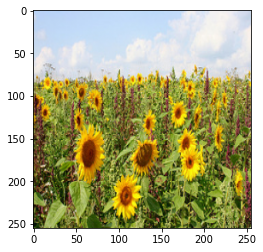

In [0]:
# Plotting random image
plt.imshow(all_images["sunflowers"][240])
plt.show()

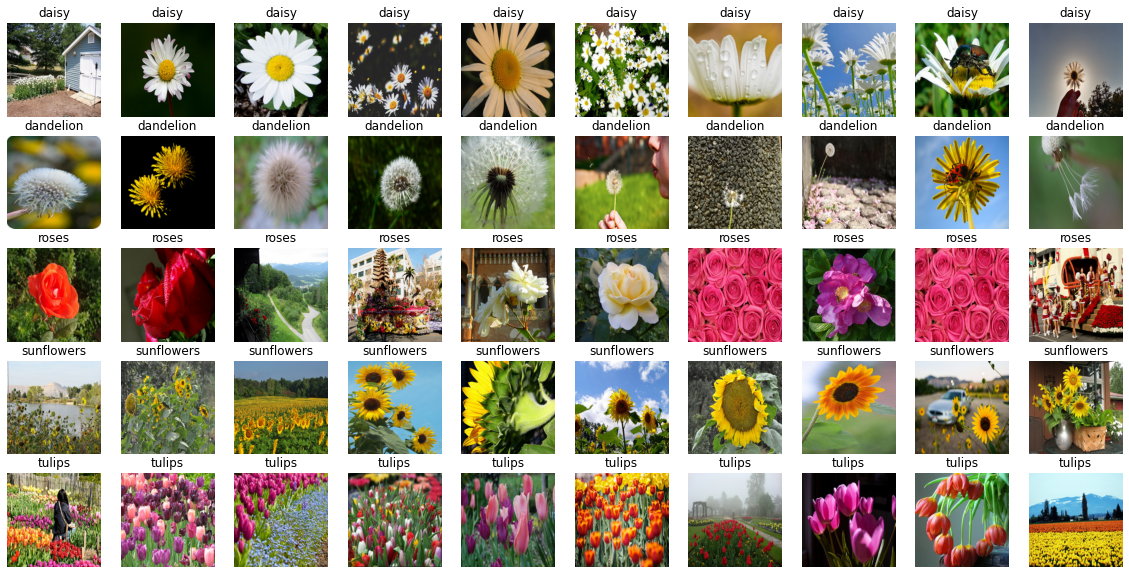

In [0]:
# Visualising random images
r,c = 5,10
rand_idx = np.random.randint(0,500,r*c)

plt.figure(figsize=(20,10))
j = -1
for i,idx in enumerate(rand_idx):
    if i%10==0:
        j += 1
        lbl = categories[j]
    img = all_images[lbl][idx]
    plt.subplot(r,c,i+1)
    plt.title(lbl)
    plt.axis('off')
    plt.imshow(img)

In [0]:
del all_images

In [0]:
categories = ["daisy",  "dandelion",  "roses",  "sunflowers",  "tulips"]
def label(category):
    index = categories.index(category)
    temp = [0,0,0,0,0]
    temp[index]=1
    return temp

In [0]:
def get_data():
    data_path = "/content/GettingStartedWithTensorFlow-TransferLearning/flower_photos/"
    categories = ["daisy",  "dandelion",  "roses",  "sunflowers",  "tulips"]
    x_train, y_train, x_test, y_test = [], [], [], []

    for category in categories:
        image_folder = os.path.join(data_path, category)
        image_names = os.listdir(image_folder)
        all_images = []

        for image_name in image_names[:400]:
            # Reading Image
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)

            # Preprocessing
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            dim = (255, 255)
            image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image = image/255
            all_images += [image]

        total_images = len(all_images)
        train_count = int(total_images*0.7)

        x_train += all_images[:train_count]
        y_train += [label(category)]*train_count

        x_test += all_images[train_count:]
        y_test += [label(category)]* (total_images-train_count)

    x_train, y_train, x_test, y_test = np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test)
    x_train, y_train = shuffle(x_train, y_train)
    x_test, y_test = shuffle(x_test, y_test) 
    
    print("Data Loaded!")      
    print("Train Data: ", x_train.shape, y_train.shape)
    print("Test Data: ", x_test.shape, y_test.shape)
    
    return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = get_data()

Data Loaded!
Train Data:  (1400, 255, 255, 3) (1400, 5)
Test Data:  (600, 255, 255, 3) (600, 5)


### Defining Keras Model

In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (255, 255, 3)
num_classes = 5

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
          batch_size=20,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

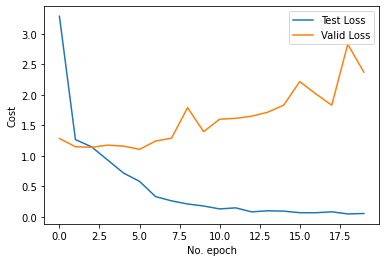

In [0]:
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')

plt.xlabel('No. epoch')
plt.ylabel('Cost')
plt.legend(loc="upper right")
plt.show()

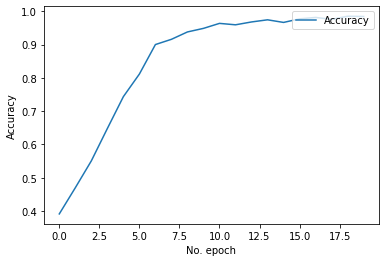

In [0]:
plt.plot(history.history['accuracy'], label='Accuracy')

plt.xlabel('No. epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.show()

In [0]:
score = model.evaluate(x_train, y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)

print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.0026222012528783773
Train accuracy: 0.9992856979370117


Test loss: 2.372834464708964
Test accuracy: 0.54666668176651
